<a href="https://colab.research.google.com/github/ColdDarkCoffee/Deep-Learning/blob/main/face_and_eye_detection_%26_Image_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/4k-wallpaper-reddit-4.jpg")

In [ ]:
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

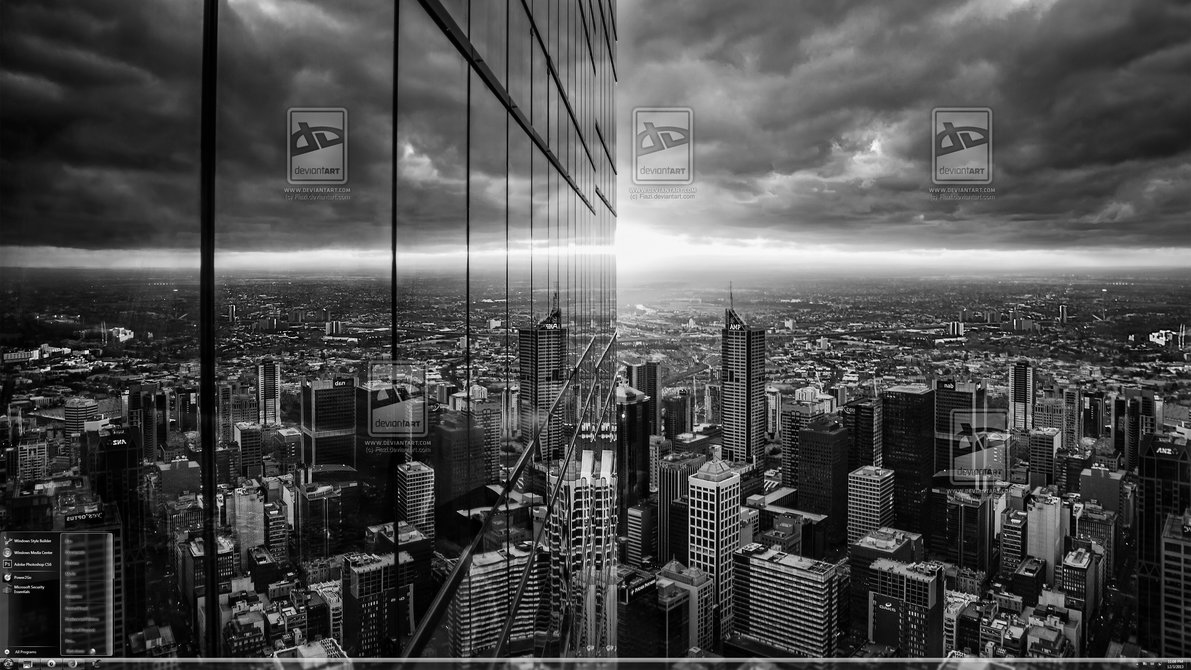

In [ ]:
cv2_imshow(gray)

In [ ]:
import cv2
import numpy as np
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Download sample video
!curl -o sample.mp4 https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_1mb.mp4

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, image = cap.read()

    if not ret:
      break

    cv2_imshow(image) # Note cv2_imshow, not cv2.imshow

    cv2.waitKey(1) & 0xff

cv2.destroyAllWindows()
cap.release()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (51) SSL: no alternative certificate subject name matches target host name 'www.sample-videos.com'


In [ ]:
import numpy as np
import cv2

# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# Load our image then convert it to grayscale
cap = cv2.VideoCapture(0)
r, frame = cap.read()

#cv2_imshow(frame)

image = cv2.imread('photo.jpg')
image2 = cv2.imread("/content/4k-wallpaper-reddit-4.jpg")
image3 = cv2.imread("/content/amazing picture.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces.any() == 0:
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2_imshow(image)
    cv2.waitKey(0)
for (x,y,w,h) in faces:
    cv2.rectangle(image2, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2_imshow(image2)
    cv2.waitKey(0)
for (x,y,w,h) in faces:
    cv2.rectangle(image3, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2_imshow(image3)
    cv2.waitKey(0)
cv2.destroyAllWindows()